#Car Price Prediction Using ANN

Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
car_df = pd.read_csv('/content/Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [ ]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
car_df.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [ ]:
car_df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [ ]:
car_df.shape

(500, 9)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


There are 425 memebers who are having annual salary greater than 50000 usd

In [ ]:
car_df[car_df['Annual Salary'] > 50000.000000]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,0,51.767418,77345.61633,6736.751680,665099.1390,64188.26862
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888


There are 75 memebers who are having annual salary less than 50000 usd

In [ ]:
car_df[car_df['Annual Salary'] < 50000.000000]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
12,Quin Smith,nulla@ipsum.edu,Nicaragua,0,44.396494,37336.33830,10218.320920,430907.1673,28700.03340
30,Herman Stevenson,sociosqu.ad.litora@erat.com,Costa Rica,1,33.483130,39627.12480,9371.511071,319837.6593,17584.56963
36,Amery Cortez,semper.et.lacinia@Morbiquisurna.ca,Suriname,1,49.853871,47460.54809,7405.534271,430624.8142,38978.67458
37,Uriel Bradshaw,ultrices@Integersemelit.com,Turkey,1,22.000387,43131.78411,10917.140940,326742.7352,10092.22509
...,...,...,...,...,...,...,...,...,...
460,Piper,erat.neque@mattisvelitjusto.org,Malawi,0,40.477103,40727.39196,9725.549901,508528.9957,29556.79320
466,India,risus.at.fringilla@feugiat.ca,Nigeria,0,54.521605,32697.98161,10858.025260,218808.7553,28463.64326
469,Igor,Proin.eget@aliquetnecimperdiet.org,Grenada,0,36.514471,43739.97829,5933.177726,517110.9454,28164.86039
485,Dolan,ipsum.Phasellus@egestasblanditNam.edu,Yemen,1,60.416433,39460.00348,8769.290288,571245.3714,47443.74443


Max Annual salary persom

In [ ]:
car_df[car_df['Annual Salary'] == 100000.000000]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


Min Annual salary persom

In [ ]:
car_df[car_df['Annual Salary'] == 20000.000000]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,Suriname,1,32.094081,20000.0,14261.80773,579181.6552,12895.71468


In [ ]:
car_df.duplicated().sum()

0

In [ ]:
car_df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [ ]:
car_df.Gender.value_counts()

1    253
0    247
Name: Gender, dtype: int64

In [ ]:
car_df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [ ]:
car_df.Country.value_counts()

Bolivia         6
Mauritania      6
Israel          6
Kyrgyzstan      5
Laos            5
               ..
Mexico          1
Honduras        1
Saudi Arabia    1
Niger           1
Sri Lanka       1
Name: Country, Length: 211, dtype: int64

In [ ]:
car_df.Gender.unique()

array([0, 1])

In [ ]:
car_df.Gender.nunique()

2

In [ ]:
car_df.Country.unique()

In [ ]:
car_df.Country.nunique()

211

211 different Countries

In [ ]:
car_df.Age.nunique()

500

Value counts

In [ ]:
for col in list(car_df):
  print(col, car_df[col].nunique())

Customer Name 498
Customer e-mail 500
Country 211
Gender 2
Age 500
Annual Salary 500
Credit Card Debt 500
Net Worth 500
Car Purchase Amount 500


In [ ]:
car_df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

Heat Map

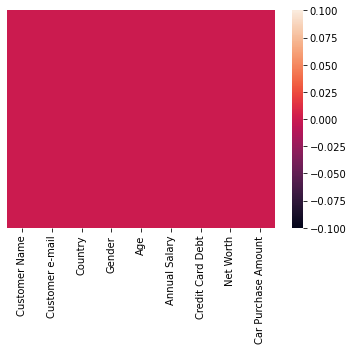

In [ ]:
sb.heatmap(car_df.isnull(), yticklabels=False)

#Exploratory Data Anaysis

In [ ]:
plt.style.use('fivethirtyeight')
sb.set_theme(context='notebook', style='darkgrid', palette='deep', font='timesnewroman', font_scale=1.2, color_codes=True, rc=None)

Histplot

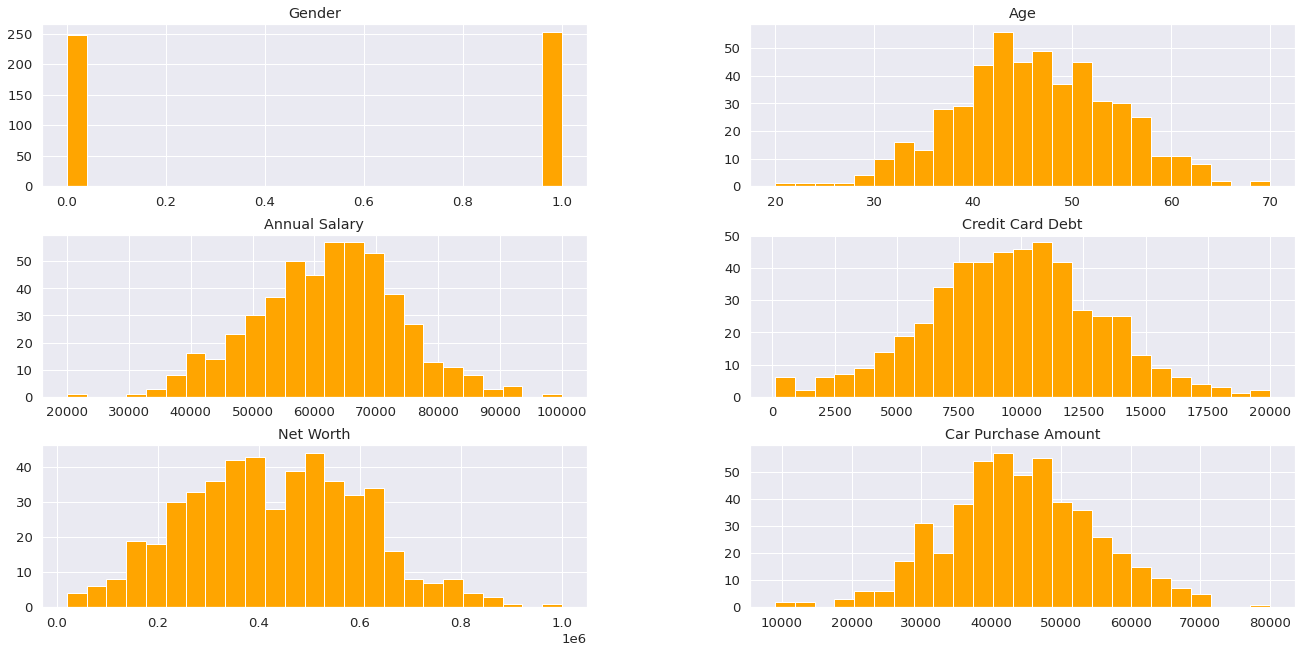

<Figure size 432x288 with 0 Axes>

In [ ]:
car_df.hist(bins=25, figsize=(20,10), color = 'Orange')
plt.show()
plt.tight_layout()

Scatter Plot

In [ ]:
car_df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

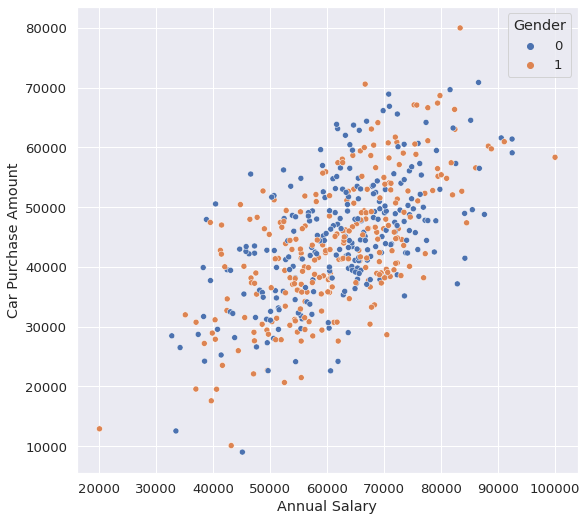

In [ ]:
plt.figure(figsize=(8,8))
sb.scatterplot(data = car_df, x ='Annual Salary', y = 'Car Purchase Amount', hue='Gender')
plt.show()

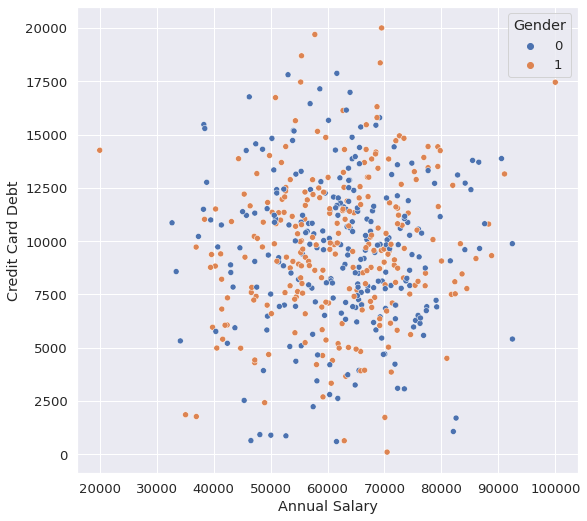

In [ ]:
plt.figure(figsize=(8,8))
sb.scatterplot(data = car_df, x ='Annual Salary', y = 'Credit Card Debt', hue='Gender')
plt.show()

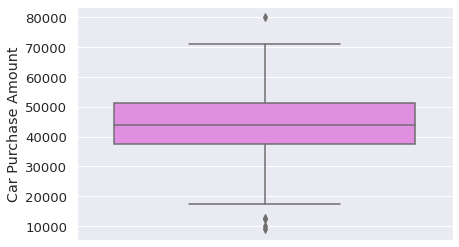

In [ ]:
sb.boxplot(data = car_df, y = 'Car Purchase Amount', color= 'Violet')

Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


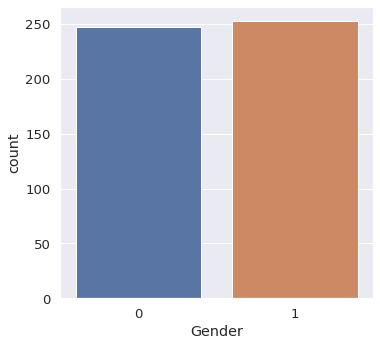

In [ ]:
plt.figure(figsize=(5,5))
sb.countplot(car_df['Gender'])
plt.show()

KDE Plot

In [ ]:
male_cus = car_df[car_df['Gender'] == 1]
female_cus = car_df[car_df['Gender']== 0]

In [ ]:
male_cus

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
...,...,...,...,...,...,...,...,...,...
491,Merrill,dolor.sit@turpisIn.com,Egypt,1,50.197205,78518.21527,10072.482980,294506.0844,52785.16947
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
female_cus

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
12,Quin Smith,nulla@ipsum.edu,Nicaragua,0,44.396494,37336.33830,10218.320920,430907.1673,28700.03340
13,Tatum Moon,Cras.sed.leo@Seddiamlorem.ca,"Palestine, State of",0,48.496515,68304.47298,9466.995128,420322.0702,49258.87571
...,...,...,...,...,...,...,...,...,...
489,Gloria,Curabitur.egestas.nunc@fermentumfermentum.ca,Gambia,0,54.879545,64430.07398,6924.106833,664862.0102,59538.40327
492,Nolan,Donec.at@neccursus.co.uk,Latvia,0,55.087720,72424.80112,9831.184792,523680.7699,60117.67886
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,0,42.900187,77665.17195,13308.879320,349588.5608,47760.66427
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,0,51.767418,77345.61633,6736.751680,665099.1390,64188.26862


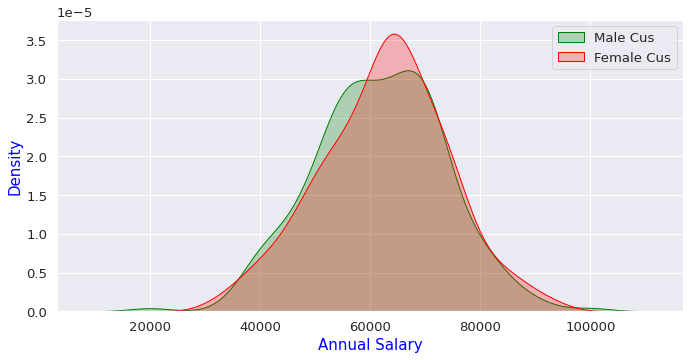

In [ ]:
plt.figure(figsize=(10,5))
sb.kdeplot(male_cus['Annual Salary'], label = 'Male Cus', color='green', shade=True)
sb.kdeplot(female_cus['Annual Salary'], label = 'Female Cus', color='red', shade=True)
plt.ylabel('Density',fontdict={'size':'15'}, color = 'blue')
plt.xlabel('Annual Salary', fontdict={'size':'15',}, color = 'blue')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


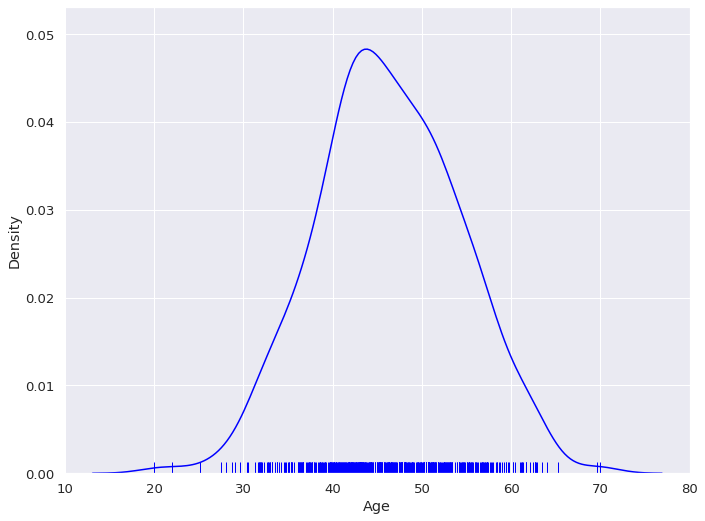

In [ ]:
plt.figure(figsize=(10,8))
sb.distplot(car_df['Age'],bins=20,color= 'blue', hist=False,rug=True, )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


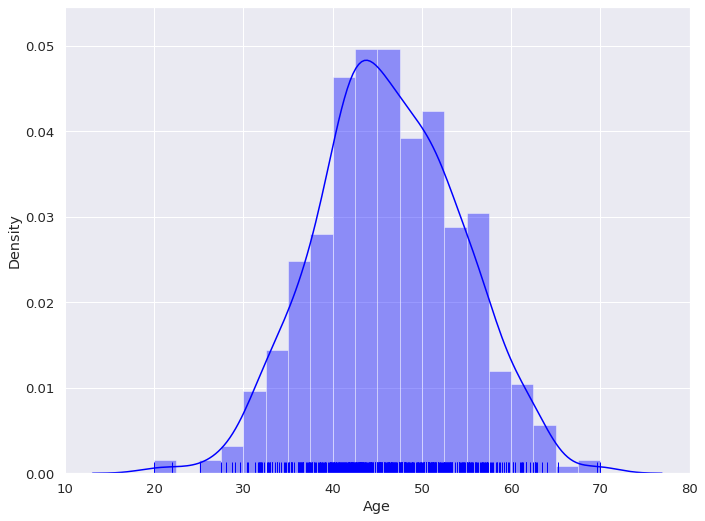

In [ ]:
plt.figure(figsize=(10,8))
sb.distplot(car_df['Age'],bins=20,color= 'blue', hist=True,rug=True)
plt.show()

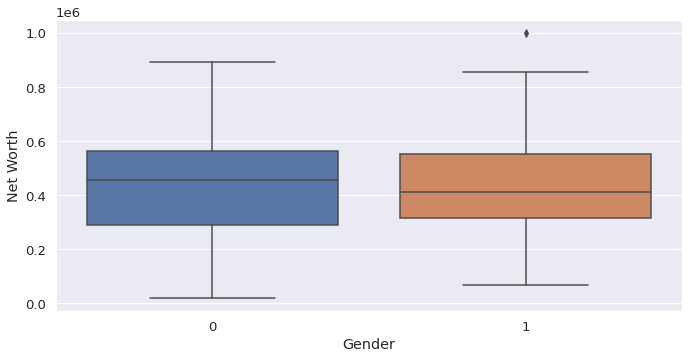

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(data = car_df, x = 'Gender', y = 'Net Worth')
plt.show()

#Heat Map

In [ ]:
car_df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


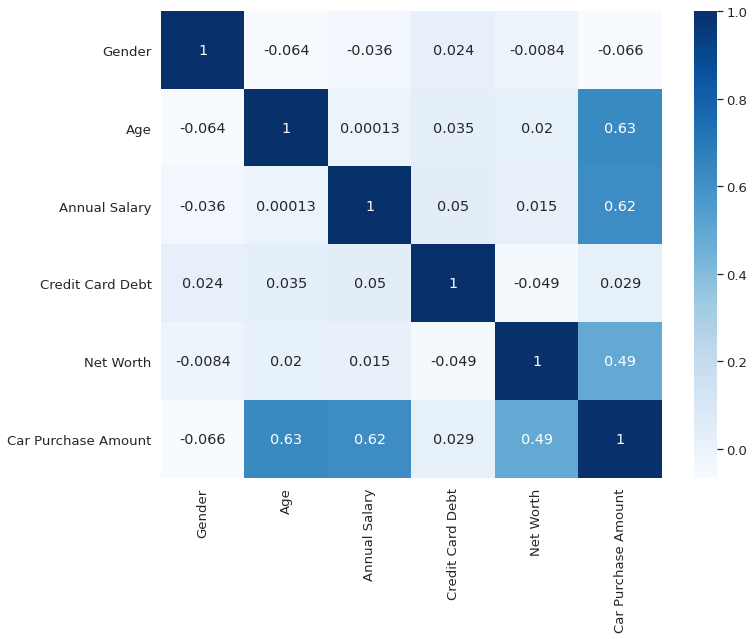

In [ ]:
plt.figure(figsize=(10,8))
sb.heatmap(car_df.corr(), cmap='Blues', annot=True)
plt.show()

#Data Cleaning 

In [ ]:
x= car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)

In [ ]:
x.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [ ]:
y = car_df['Car Purchase Amount']

In [ ]:
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64

Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
fet_imp = ExtraTreesRegressor()
fet_imp.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
fet_imp.feature_importances_

array([0.00744071, 0.38986277, 0.36601957, 0.01150792, 0.22516903])

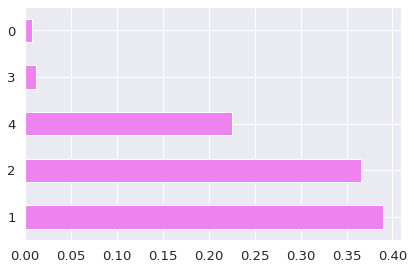

In [ ]:
fet_imp_bar = pd.Series(fet_imp.feature_importances_)
fet_imp_bar.nlargest(10).plot(kind='barh', color = 'Violet')
plt.show()

Feature Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

In [ ]:
x_scaled.shape

(500, 5)

In [ ]:
y_scaled.shape

(500, 1)

Splitting DataSet

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, train_size = 0.8, random_state= 10)

#Applying ANN

In [ ]:
import tensorflow.keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Adding Layers

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(35,input_dim=5,activation='relu',)) #input layer
ann_model.add(Dense(35,activation='relu')) #hidden layer
ann_model.add(Dense(1,activation='linear')) #output layer

In [ ]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 35)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 35)                1260      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 36        
Total params: 1,506
Trainable params: 1,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

Optimizer is Gradient decent method
Binary Cross Entropy ---For Classification in place of loss

In [ ]:
epochs_hist = ann_model.fit(x_train,y_train, epochs = 20, batch_size=25)

Epoch 1/20
16/16 [==============================] - 1s 2ms/step - loss: 0.0246
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 7.4181e-04
Epoch 9/20
16/16 [==============================] - 0s 2ms/step - loss: 6.2755e-04
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 5.3858e-04
Epoch 11/20
16/16 [==============================] - 0s 2ms/step - loss: 3.6104e-04
Epoch 12/20
16/16 [==============================] - 0s 3ms/step - loss: 3.4875e-04
Epoch 13/20
16/16 [==========

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss'])


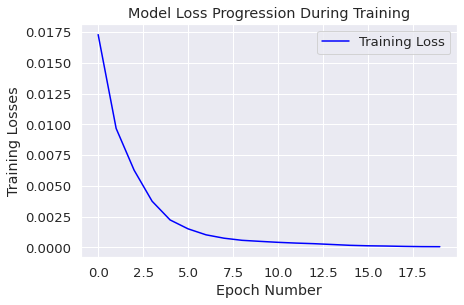

In [ ]:
plt.plot(epochs_hist.history['loss'], color = 'Blue')
plt.title('Model Loss Progression During Training')
plt.ylabel('Training Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss'])

In [ ]:
x_testing = np.array([[1,	57.313749	,59729.15130,	5358.712177,	560304.0671]])

In [ ]:
y_pred = ann_model.predict(x_testing)

In [ ]:
y_pred

array([[155746.19]], dtype=float32)

Original value = 55915.46248
Predicted Value = 155746.19


#R2_Score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_predi = ann_model.predict(x_test)

In [ ]:
r2_score(y_test, y_predi)

0.9971737750518057

In [ ]:
from sklearn.metrics import mean_squared_error, max_error,  explained_variance_score

In [ ]:
mean_squared_error(y_test, y_predi)

5.31914416427467e-05

In [ ]:
max_error(y_test, y_predi)

0.03756560388864427

In [ ]:
explained_variance_score(y_test, y_predi)

0.9971757624284395

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lrm = lrm.predict(x_test)

In [ ]:
r2_score(y_test, y_pred_lrm)

0.999999974803728

In [ ]:
x_testing_lrm = np.array([[1,	57.313749	,59729.15130,	5358.712177,	560304.0671]])

In [ ]:
y_pred_lrm1 = lrm.predict(x_testing_lrm)

In [ ]:
y_pred_lrm1

array([[262031.72530102]])

Original value = 55915.46248
Predicted Value =262031.72530102

#Extra Treeregressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor()
extra.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_extra = extra.predict(x_test)
r2_score(y_test, y_pred_extra)

0.9789907180584547

In [ ]:
x_testing_extra = np.array([[1,	57.313749	,59729.15130,	5358.712177,	560304.0671]])
y_pred_extra1 = extra.predict(x_testing_extra)
y_pred_extra1

array([0.96726776])

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()
rand.fit(x_train, y_train)
y_pred_rand = rand.predict(x_test)
x_testing_rand = np.array([[1,	57.313749	,59729.15130,	5358.712177,	560304.0671]])
y_pred_rand1 = rand.predict(x_testing_extra)
y_pred_rand1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.93690801])

In [ ]:
r2_score(y_test, y_pred_rand)

0.9586613042575811

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred_rand)

0.0007211160147231073